In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [10]:
df = pd.read_csv("CacheAccessStatMid.csv")
SEC_TO_NANO = 1000000000
sim_freq = 1000000000
df["NumElements4"] = df["NumElements"]*4
df["Time"] = (df["simTicks"]/sim_freq *SEC_TO_NANO)/10
df["L1DCacheMissRatio"]=df["L1DCacheMisses"]/df["L1DCacheAccesses"]
df["L1CacheMissRatio"]=(df["L1DCacheMisses"]+df["L1ICacheMisses"])/(df["L1DCacheAccesses"]+df["L1ICacheAccesses"])
df["L2CacheMissRatio"]=df["L2CacheMisses"]/df["L2CacheAccesses"]
df["L3CacheMissRatio"]=df["L3CacheMisses"]/df["L3CacheAccesses"]
df

,simTicks,NumElements,L1DCacheHits,L1DCacheMisses,L1DCacheAccesses,L1ICacheHits,L1ICacheMisses,L1ICacheAccesses,L2CacheHits,L2CacheMisses,L2CacheAccesses,L3CacheHits,L3CacheMisses,L3CacheAccesses,NumElements4,Time,L1DCacheMissRatio,L1CacheMissRatio,L2CacheMissRatio,L3CacheMissRatio
0,720.550,4000000,2456075,1262987,3719062,26824683,4390,26829073,0,1016744,1016744,516365,500379,1016744,16000000,72.0550,0.339598,0.041488,1.0,0.492139
1,720.554,4180000,2566529,1319365,3885894,28028086,4576,28032662,0,1062029,1062029,539148,522881,1062029,16720000,72.0554,0.339527,0.041479,1.0,0.492342
2,1255.300,4360000,2677053,1375742,4052795,29232026,4762,29236788,0,1107314,1107314,530841,576473,1107314,17440000,125.5300,0.339455,0.041470,1.0,0.520605
3,1255.004,4540000,2787615,1432120,4219735,30436102,4952,30441054,0,1152604,1152604,531131,621473,1152604,18160000,125.5004,0.339386,0.041461,1.0,0.539190
4,1255.200,4720000,2897856,1488497,4386353,31637657,5137,31642794,0,1197887,1197887,531414,666473,1197887,18880000,125.5200,0.339347,0.041456,1.0,0.556374
5,1255.913,4900000,3008325,1544872,4553197,32841115,5323,32846438,0,1243170,1243170,531697,711473,1243170,19600000,125.5913,0.339294,0.041449,1.0,0.572305
6,1255.479,5080000,3118747,1601243,4719990,34044377,5509,34049886,0,1288452,1288452,531979,756473,1288452,20320000,125.5479,0.339247,0.041443,1.0,0.587118
7,1242.028,5260000,3229310,1657620,4886930,35248455,5697,35254152,0,1333738,1333738,532265,801473,1333738,21040000,124.2028,0.339195,0.041437,1.0,0.600922
8,1204.997,5440000,3339553,1713995,5053548,36450012,5879,36455891,0,1379017,1379017,532546,846471,1379017,21760000,120.4997,0.339167,0.041433,1.0,0.613822
9,1204.861,5620000,3450113,1770375,5220488,37654094,6064,37660158,0,1424304,1424304,532831,891473,1424304,22480000,120.4861,0.339121,0.041428,1.0,0.625901


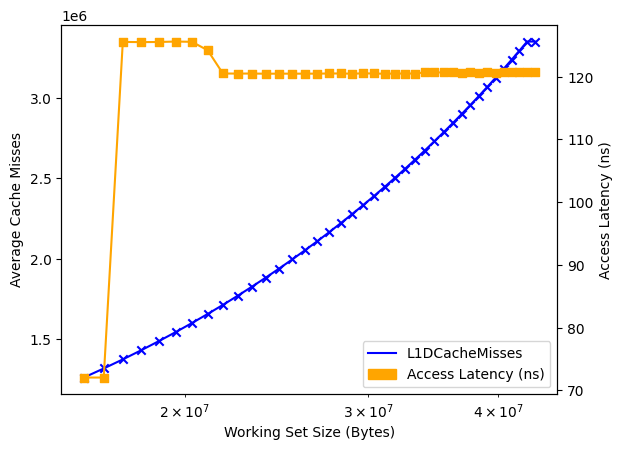

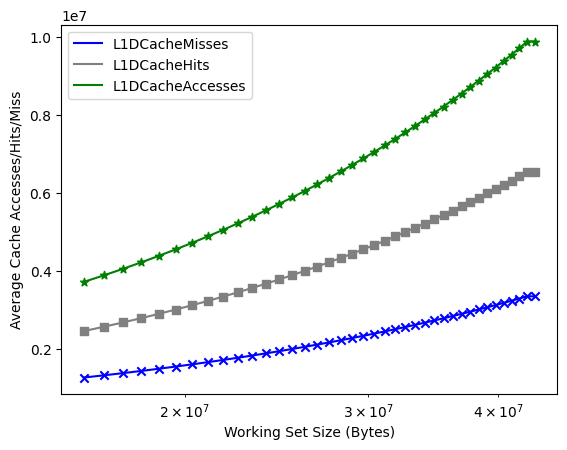

In [11]:
fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L1DCacheMisses,color = 'blue',label = 'L1DCacheMisses')
ax.set_ylabel("Average Cache Misses")
ax.set_xlabel("Working Set Size (Bytes)")
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax.scatter(df.NumElements4,df.L1DCacheMisses,color = 'blue', marker ='x')
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles)

plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L1DCacheMisses,color = 'blue',label = 'L1DCacheMisses')
ax.plot(df.NumElements4,df.L1DCacheHits,color = 'grey',label = 'L1DCacheHits')
ax.plot(df.NumElements4,df.L1DCacheAccesses,color = 'green',label = 'L1DCacheAccesses')
ax.scatter(df.NumElements4,df.L1DCacheMisses,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L1DCacheHits,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L1DCacheAccesses,color = 'green', marker = '*')
ax.set_ylabel("Average Cache Accesses/Hits/Miss")
ax.set_xlabel("Working Set Size (Bytes)")
plt.legend()

plt.xscale('log')
plt.show()

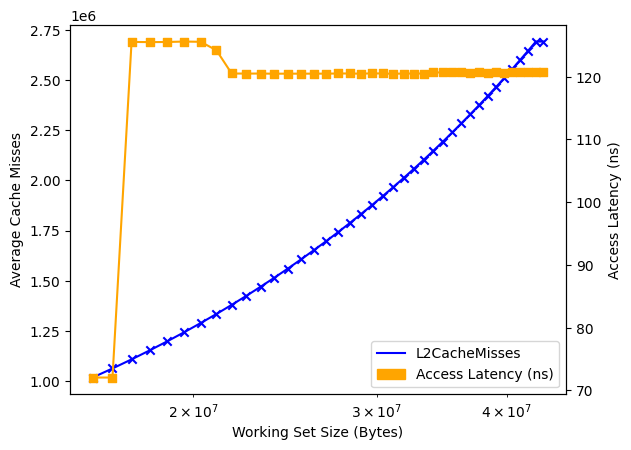

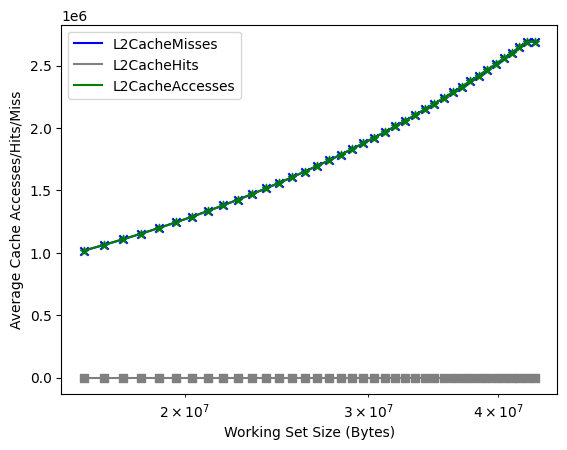

In [12]:
fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L2CacheMisses,color = 'blue',label = 'L2CacheMisses')
ax.set_ylabel("Average Cache Misses")
ax.set_xlabel("Working Set Size (Bytes)")
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax.scatter(df.NumElements4,df.L2CacheMisses,color = 'blue', marker ='x')
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles)

plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L2CacheMisses,color = 'blue',label = 'L2CacheMisses')
ax.plot(df.NumElements4,df.L2CacheHits,color = 'grey',label = 'L2CacheHits')
ax.plot(df.NumElements4,df.L2CacheAccesses,color = 'green',label = 'L2CacheAccesses')
ax.scatter(df.NumElements4,df.L2CacheMisses,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L2CacheHits,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L2CacheAccesses,color = 'green', marker = '*')
ax.set_ylabel("Average Cache Accesses/Hits/Miss")
ax.set_xlabel("Working Set Size (Bytes)")
plt.legend()

plt.xscale('log')
plt.show()

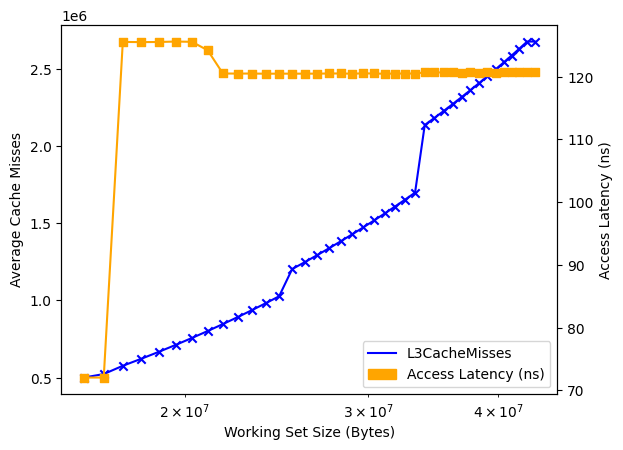

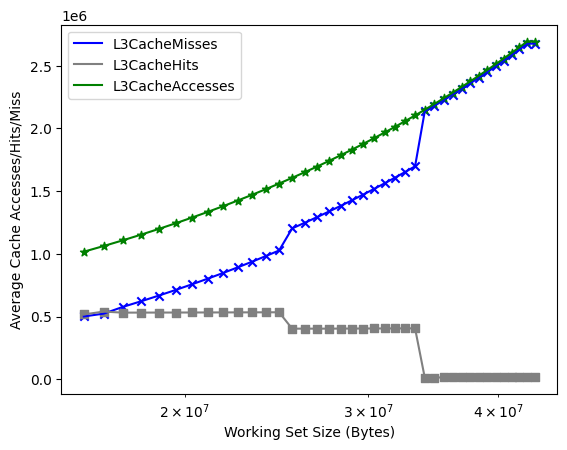

In [13]:
fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L3CacheMisses,color = 'blue',label = 'L3CacheMisses')
ax.set_ylabel("Average Cache Misses")
ax.set_xlabel("Working Set Size (Bytes)")
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax.scatter(df.NumElements4,df.L3CacheMisses,color = 'blue', marker ='x')
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles)

plt.xscale('log')
plt.show()

fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L3CacheMisses,color = 'blue',label = 'L3CacheMisses')
ax.plot(df.NumElements4,df.L3CacheHits,color = 'grey',label = 'L3CacheHits')
ax.plot(df.NumElements4,df.L3CacheAccesses,color = 'green',label = 'L3CacheAccesses')
ax.scatter(df.NumElements4,df.L3CacheMisses,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L3CacheHits,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L3CacheAccesses,color = 'green', marker = '*')
ax.set_ylabel("Average Cache Accesses/Hits/Miss")
ax.set_xlabel("Working Set Size (Bytes)")
plt.legend()

plt.xscale('log')
plt.show()

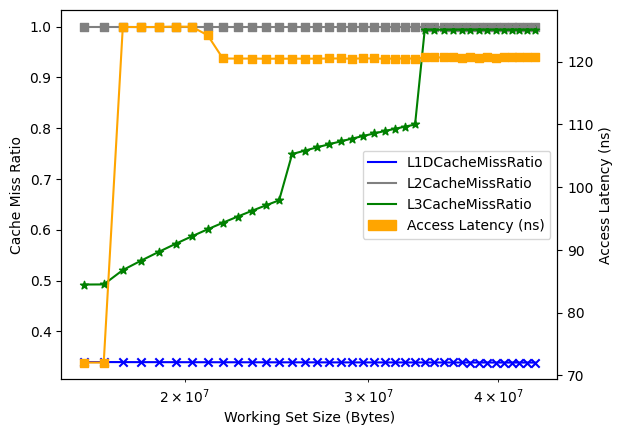

In [17]:

fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L1DCacheMissRatio,color = 'blue',label = 'L1DCacheMissRatio')
ax.plot(df.NumElements4,df.L2CacheMissRatio,color = 'grey',label = 'L2CacheMissRatio')
ax.plot(df.NumElements4,df.L3CacheMissRatio,color = 'green',label = 'L3CacheMissRatio')
ax.scatter(df.NumElements4,df.L1DCacheMissRatio,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L2CacheMissRatio,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L3CacheMissRatio,color = 'green', marker = '*')
ax.set_ylabel("Cache Miss Ratio")
ax.set_xlabel("Working Set Size (Bytes)")

#plot time
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles, loc = "center right")


plt.xscale('log')
plt.show()


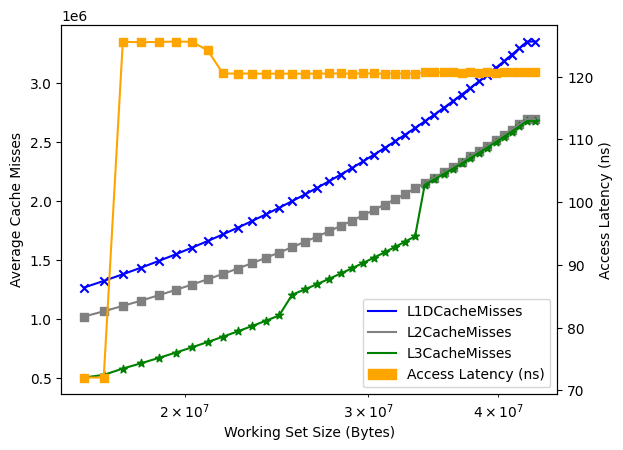

In [15]:


fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L1DCacheMisses,color = 'blue',label = 'L1DCacheMisses')
ax.plot(df.NumElements4,df.L2CacheMisses,color = 'grey',label = 'L2CacheMisses')
ax.plot(df.NumElements4,df.L3CacheMisses,color = 'green',label = 'L3CacheMisses')
ax.scatter(df.NumElements4,df.L1DCacheMisses,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L2CacheMisses,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L3CacheMisses,color = 'green', marker = '*')
ax.set_ylabel("Average Cache Misses")
ax.set_xlabel("Working Set Size (Bytes)")

#plot time
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles)


plt.xscale('log')
plt.show()



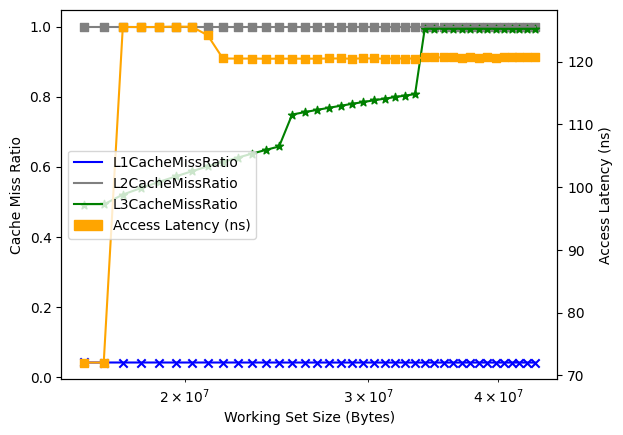

In [16]:

fig, ax = plt.subplots()
ax.plot(df.NumElements4,df.L1CacheMissRatio,color = 'blue',label = 'L1CacheMissRatio')
ax.plot(df.NumElements4,df.L2CacheMissRatio,color = 'grey',label = 'L2CacheMissRatio')
ax.plot(df.NumElements4,df.L3CacheMissRatio,color = 'green',label = 'L3CacheMissRatio')
ax.scatter(df.NumElements4,df.L1CacheMissRatio,color = 'blue', marker ='x')
ax.scatter(df.NumElements4,df.L2CacheMissRatio,color = 'grey', marker = 's')
ax.scatter(df.NumElements4,df.L3CacheMissRatio,color = 'green', marker = '*')
ax.set_ylabel("Cache Miss Ratio")
ax.set_xlabel("Working Set Size (Bytes)")

#plot time
ax2 = ax.twinx()
ax2.plot(df.NumElements4,df.Time,color='orange',label="Access Latency (ns)")
ax2.scatter(df.NumElements4,df.Time,color = 'orange', marker = 's')
ax2.set_ylabel("Access Latency (ns)")
#set legend
handles, labels = ax.get_legend_handles_labels()
patch = mpatches.Patch(color='orange', label='Access Latency (ns)')
# handles is a list, so append manual patch
handles.append(patch) 
# plot the legend
plt.legend(handles=handles, loc = "center left")


plt.xscale('log')
plt.show()
